In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [3]:
def HPR(p, C, param):
    p = p.copy()
    n_p = p.shape[0]
    dim_p = p.shape[1]

    p = p - C
    norma_p = np.linalg.norm(p, axis=1)
    r = np.max(norma_p) * (10**param)

    P = p + 2 * (r - norma_p)[:, None] * (p / norma_p[:, None])

    origem = np.zeros((1, dim_p))
    total = np.vstack([P, origem])

    hull = ConvexHull(total)

    visiblePtInds = np.unique(hull.vertices)
    visiblePtInds = visiblePtInds[visiblePtInds != n_p]

    return visiblePtInds


In [4]:
def measure_time(n, repeats=3):
    tempos = []

    for _ in range(repeats):
        pontos = np.random.rand(n, 3)
        C = np.array([2.0, 2.0, 2.0])

        start = time.perf_counter()
        HPR(pontos, C, param=1.5)
        end = time.perf_counter()

        tempos.append(end - start)

    return np.mean(tempos)


In [8]:
#Foram utilizados valores diferente dos plotados para melhor análise
ns = [50, 100, 1000, 5000, 10000, 100000]
tempos = []

for n in ns:
    t = measure_time(n)
    tempos.append(t)
    print(f"n={n:6d} | tempo={t:.6f}s")

n=    50 | tempo=0.000730s
n=   100 | tempo=0.000892s
n=  1000 | tempo=0.001989s
n=  5000 | tempo=0.006651s
n= 10000 | tempo=0.011812s
n=100000 | tempo=0.140698s


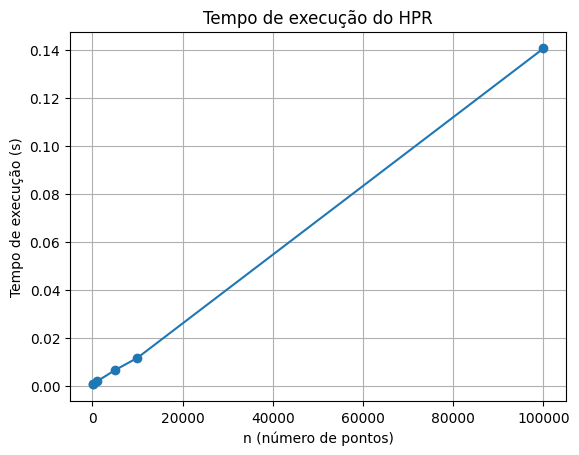

In [9]:
plt.figure()
plt.plot(ns, tempos, marker='o')
plt.xlabel("n (número de pontos)")
plt.ylabel("Tempo de execução (s)")
plt.title("Tempo de execução do HPR")
plt.grid(True)
plt.show()

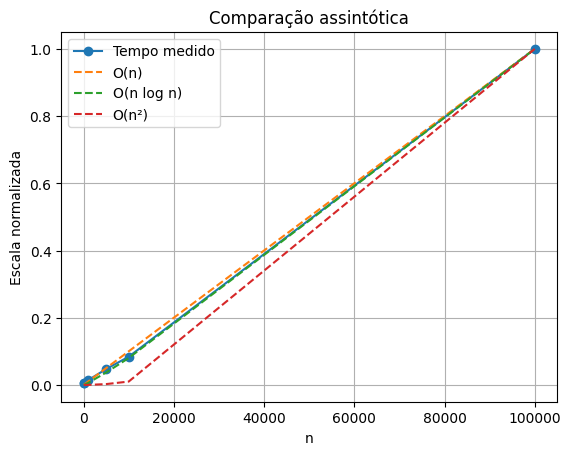

In [10]:
ns_arr = np.array(ns)
tempos_arr = np.array(tempos)

# Normalização para comparar forma, não escala
linear = ns_arr / ns_arr.max()
nlogn = ns_arr * np.log(ns_arr)
nlogn = nlogn / nlogn.max()
quadratic = ns_arr**2
quadratic = quadratic / quadratic.max()

tempos_norm = tempos_arr / tempos_arr.max()

plt.figure()
plt.plot(ns_arr, tempos_norm, 'o-', label='Tempo medido')
plt.plot(ns_arr, linear, '--', label='O(n)')
plt.plot(ns_arr, nlogn, '--', label='O(n log n)')
plt.plot(ns_arr, quadratic, '--', label='O(n²)')
plt.xlabel("n")
plt.ylabel("Escala normalizada")
plt.title("Comparação assintótica")
plt.legend()
plt.grid(True)
plt.show()
